# Dimensionality Reduction
<div style='font-size:20px'>

<img src="https://raw.githubusercontent.com/farrelarrizal/PublicDataset/main/DR-1.jpg" width="80%"/>



**What is dimensionality reduction?**

In statistics, machine learning, and information theory, dimensionality reduction or dimension reduction is the process of **reduction of n-dimensions to a k-dimensions** where k<<n. 

It is applied to **a large population**, for e.g., one can remember dialogues and scenes of a movie which he might have watched years before, on the other hand, it is difficult for him to recall the subject he recently read.

**Essence of Dimensionality Reduction:**
It’s not feasible to analyze each and every dimensions at a microscopic level in a high dimensional data. It might take us days or months to perform any meaningful analysis which requires lot of time, money and manpower in our business which is not often encouraged. Training a data with high dimensions will lead us problems like:

* Space required to store the data gets increased with increasing dimensions.
* **Simplification** , reduce number of variables you have to worry about 
* Less dimensions will **take low time complexity** in training a model.
* As dimensions increases, the possibility of overfitting the model also gets increased.
* **Difficulty in interpretation and visualize** a high dimensional data. By dimensionality reduction we will reduce the data to 2D or 3D for better visualization.
* It will remove all the correlated features in our data.

<img src="https://raw.githubusercontent.com/farrelarrizal/PublicDataset/main/DR-2.jpg" width="80%"/> 

**Components of Dimensionality Reduction:**

**1. Feature Selection**

   **Most of the times the features are not relevant to our problem.** For example, we are training a model for predicting the heights of people and we have data with features( weights, color, moles, marital status, gender). We can see that the features like color, moles and marital status are not linked with the heights of people i.e., irrelevant to our problem of finding heights of people. Hence we need to come up with a solution of finding features which are most useful for our task. We can achieve this by following ways:
   - **Business understanding** , domain knowledge and experts solution can help us to choose predictors(features) that are impacting response variable (target). But their may be a chance of losing information if we can’t find useful predictors or if we miss useful features.
   
   - We build a classical ML model, and we will **select the features basing on the correlation with target variables.** A feature with high degree of fit is more likely to be choosed compared with the feature with low degree of fit.
   
   - **Reduction of features** can also help us to tackle this problem. Suppose using PCA (which will discussed in the later session) which helps us to find components that projects the data into lower dimensions with less loss of information.



**2. Feature Projection**

Feature Projection also know as Feature Extraction is **used to transform the data in high dimensional space to low dimensional space.** The data transformation can be done in both linear and non linear.

For linear transformation we have **principal component analysis(PCA)**, **Linear Discriminant Analysis(LDA)** and for non-linear transformations we **apply T-SNE**.
</div>
<br>
<hr>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [2]:
sns.set_theme(style="darkgrid")

In [3]:
url_happiness_dataset = 'https://raw.githubusercontent.com/farrelarrizal/PublicDataset/main/happiness_2019.csv'
happiness = pd.read_csv(url_happiness_dataset)

In [4]:
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
happiness.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [6]:
happiness.columns = ['rank', 'country', 'score', 'gdp', 'social', 
                     'life_expectancy', 'freedom', 'generosity', 'corruption']


In [7]:
happiness.head()

,rank,country,score,gdp,social,life_expectancy,freedom,generosity,corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


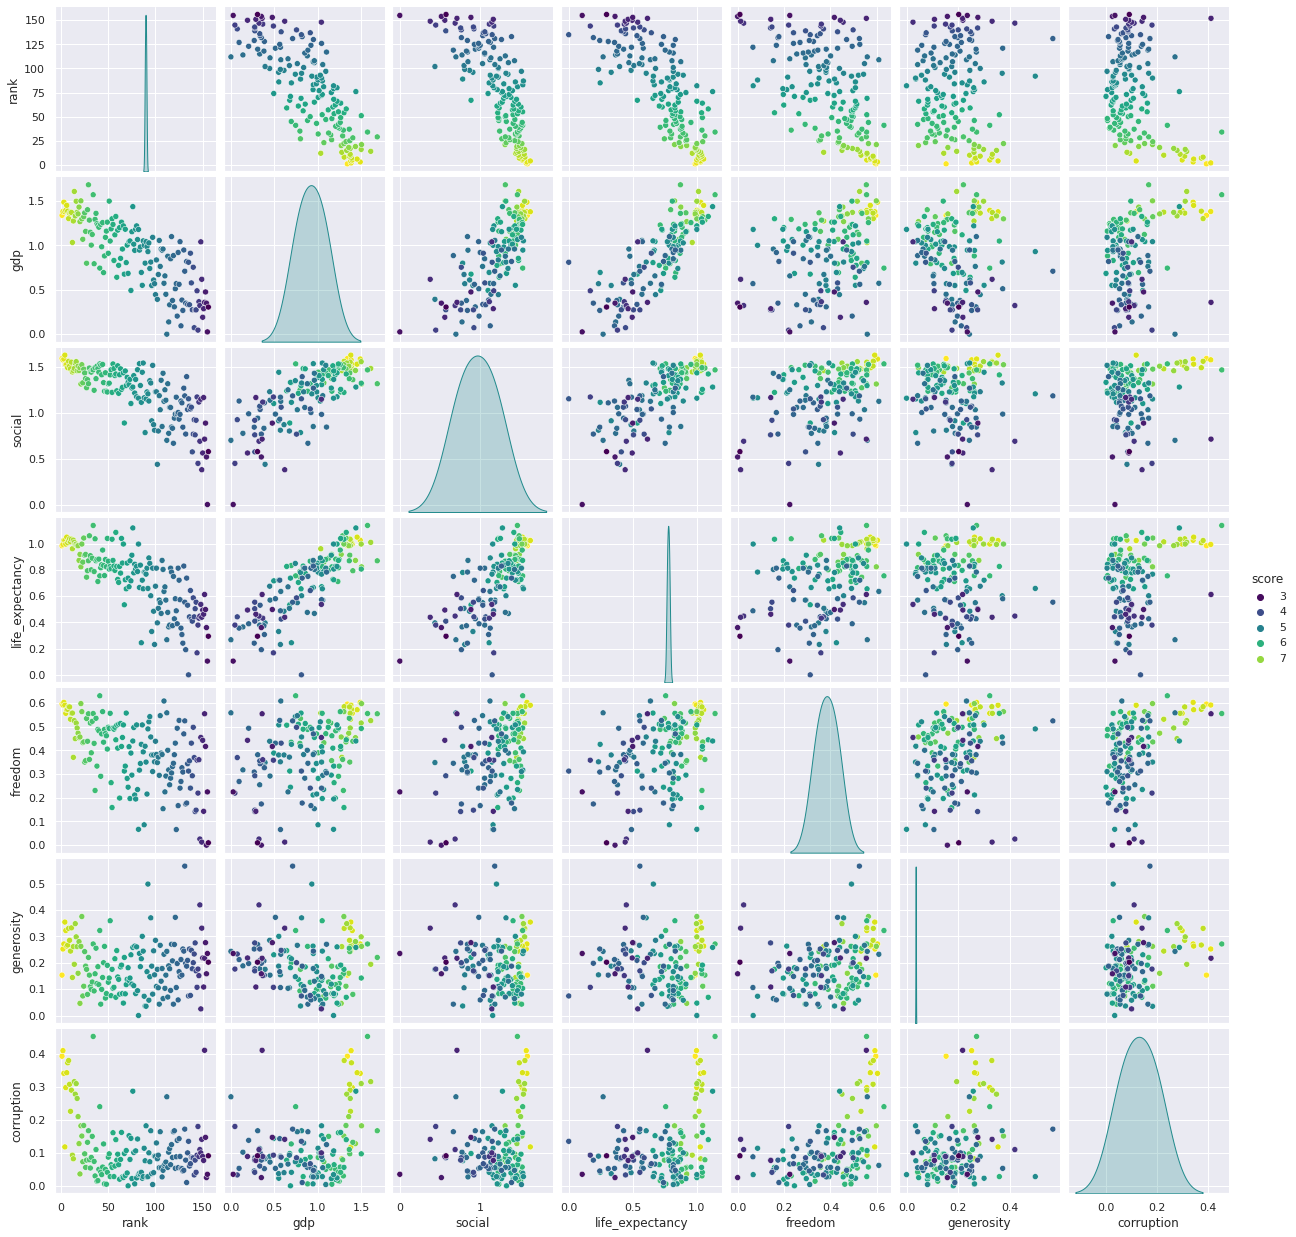

In [8]:
sns.pairplot(happiness, hue='score', palette='viridis')
plt.show()

In [9]:
x_columns = ['gdp', 'social', 'life_expectancy', 'freedom', 'generosity', 'corruption']
y_columns = ['score']

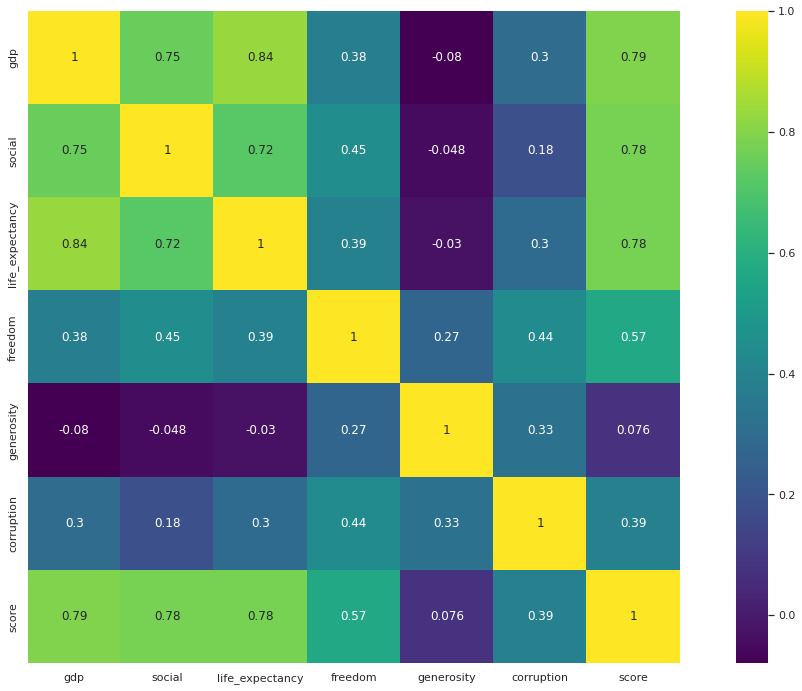

In [10]:
corrmat = happiness[x_columns + y_columns].corr()
f, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corrmat, square=True, annot=True, cmap='viridis');

## Feature Extraction

# Principal Component Analysis (PCA)
<br>
<div style='font-size:16px'>


<em>
    Funfact : PCA was invented in 1901 by Karl Pearson as an analogue of the principal axis theorem in mechanics; it was later independently developed and named by Harold Hotelling in the 1930s
    </em>

PCA is mostly used as a tool in **exploratory data analysis (EDA) and for making predictive models**. It is often used to visualize genetic distance and relatedness between populations. PCA can be done by eigenvalue decomposition of a data covariance (or correlation) matrix or singular value decomposition of a data matrix.

For better understanding of principle working of PCA let’s take 2D data.
<img src="https://miro.medium.com/max/720/1*fsmQMsTUmGlVocmPb25_2Q.png" width="80%"/>
<center>2D representation of data.</center>


<img src="https://miro.medium.com/max/720/1*1BHI5olPI4te-7V2I_rFYg.png" width="70%"/>
    
1. Firstly we will normalize the data such that the average value shifts to the origin and all the data lie in a unit square.
    
2. Now we will try to fit a line to the data. For that we will try out with a random line. Now we will rotate the line until it fits best to the data.

Ultimately we end up with the following fit (high degree of fit) which explains the maximum variance of a feature.
<img src="https://miro.medium.com/max/720/1*4XZzGobQIdYxmDwF4cfw8A.png" width="100%"/>

Advantages :
    
- It removes correlated features.
- Improves model efficiency.
- Reduces overfitting.
- Improves Visualization.
    
Disadvantages : 
    
- PCA is a linear algorithm and it <strong>won’t work very well for polynomial </strong>or other complex functions. We can some how use kernel PCA for such data.

- After PCA we may loose lot of information if we won’t <strong>choose the right number</strong> of dimensions to get eliminated.

- less interpretability, since the original features transforms to principal components which are not as readable as original features.
</div>

In [11]:
happiness.head()

,rank,country,score,gdp,social,life_expectancy,freedom,generosity,corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [12]:
# cek nilai variansi
happiness[x_columns].var(axis=0)

gdp                0.158714
social             0.089515
life_expectancy    0.058624
freedom            0.020532
generosity         0.009073
corruption         0.008937
dtype: float64

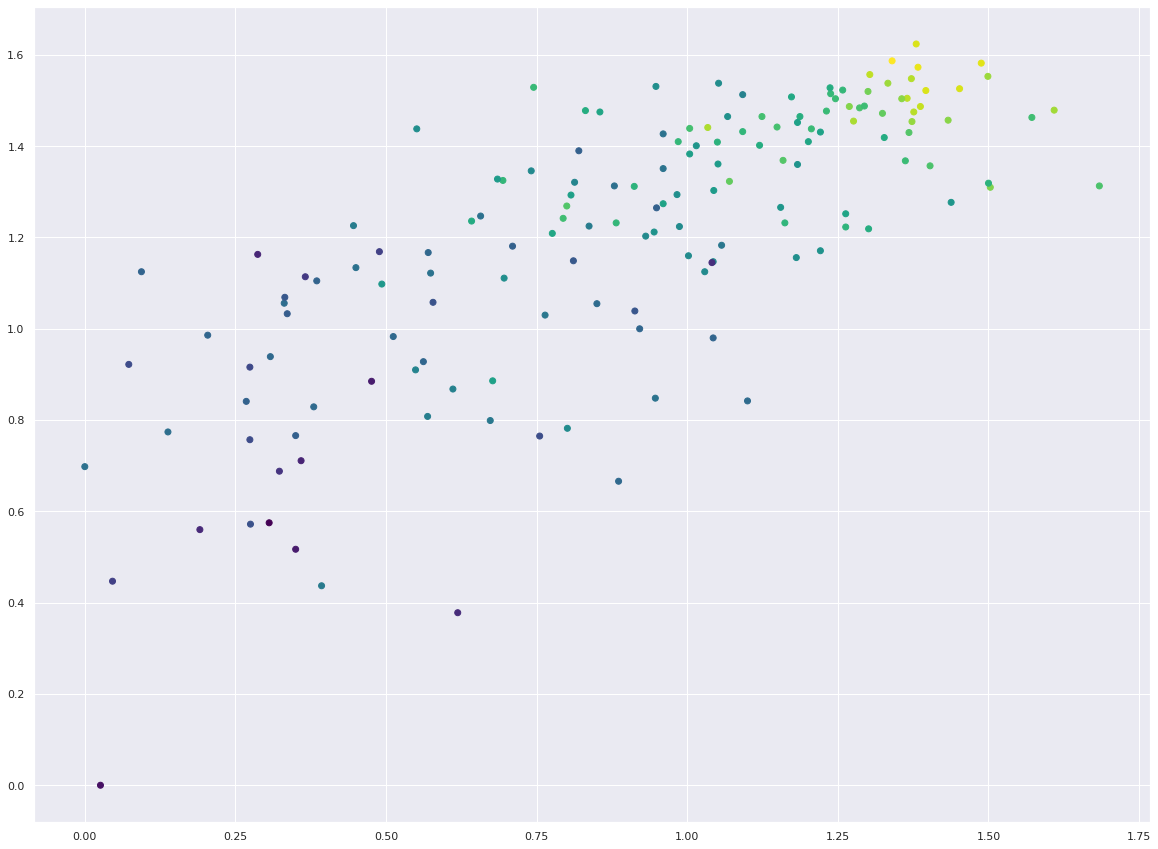

In [13]:
plt.figure(figsize=(20, 15))
plt.scatter(happiness.gdp, happiness.social, 
            c=happiness.score, cmap='viridis')
plt.show()

In [14]:
pca   = PCA()
x_pca = pca.fit_transform(StandardScaler().fit_transform(happiness[x_columns]))

In [15]:
# Lihat sebaran ratio 
pca.explained_variance_ratio_

array([0.49826532, 0.23760052, 0.10164186, 0.09271212, 0.04355392,
       0.02622626])

In [16]:
x_pca.shape

(156, 6)

Dari penjelasan variance diatas maka kita dapat memahami dengan menggunakan 2 kolom diawal maka sudah merepresentasikan data hingga **73,5%**

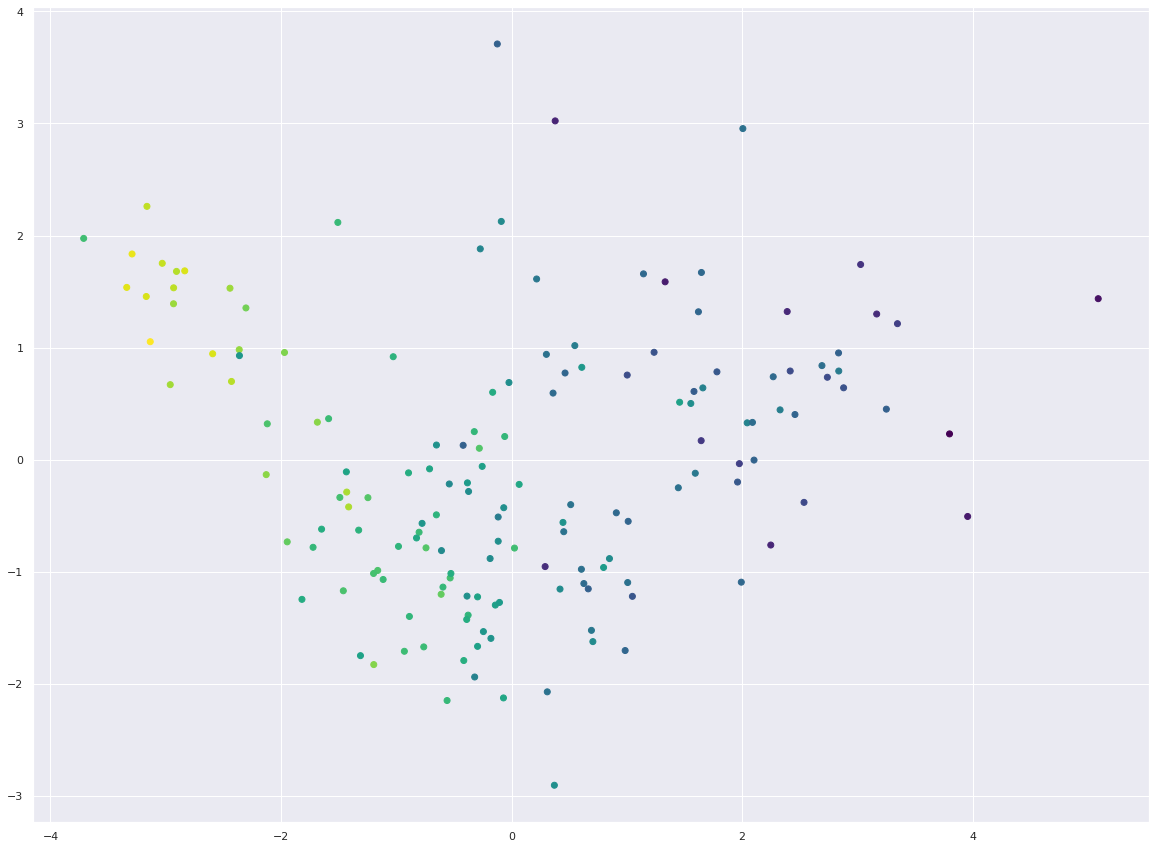

In [17]:
plt.figure(figsize=(20, 15))
plt.scatter(x_pca[:, 0], x_pca[:, 1], 
           c=happiness.score, cmap='viridis')
plt.show()

### Linear Discriminant Analysis

<div style='font-size:16px'>
    <em>The original discriminant analysis was developed by Ronald Fisher in 1936 which is described for two class classification problem and it was later generalized as a multi class discriminant analysis by CR Rao in 1948 which is now called as Linear discriminant analysis or Normal discriminant analysis and Discriminant function analysis.</em>

LDA is the most commonly used as dimensionality reduction technique in the preprocessing step in machine learning and in statistics, pattern recognition. While the goal of this algorithm is to **project a dataset to a lower dimensional space** with a separability of the categories in order to avoid overfitting and to reduce the computational power of the machines.

Both PCA and LDA are **linear reduction techniques** but unlike PCA, LDA focuses on **maximizing the separability** of two groups.

LDA uses features to **create a new axes** and tries to project the data onto a new axes in a way to maximize the separation of the two categories or groups. This is why LDA is a Supervised learning algorithm since it is makes use of target values to find the new axes.

PCA tries to find the components that maximizes the variance, while on the other hand **LDA tries to find the new axes that**

i) Maximizes the separability of the categories and
<img src="https://miro.medium.com/max/720/1*FRclC4o96iLtfCN1N5rU2A.png" width="100%"/>

ii) Minimizes the variance among categories.
<img src="https://miro.medium.com/max/720/1*Gq4TrWYnYk62qK9I-f-qsQ.png" width="100%"/>

By minimizing the variance, we can well separate the clusters of individual groups. Hence it is as important as maximizing the mean values of groups.

<img src="https://miro.medium.com/max/720/1*GxKiZYOmCF3L5OO9WVVdQw.png" width="100%"/>

LDA for more than 2 categories:

Consider the data which has more than 2 groups in such cases LDA finds the mean value of whole data and the center among the individual groups, now it tries to maximize the distance from the center mean value to the individual group mean value. For better understanding look at the following data with 3 categories.

<img src="https://miro.medium.com/max/720/1*yZTKrfPFOhdwyumagpNNFA.png" width="100%"/>

Now we can find a plane that best separates the three groups.
<img src="https://miro.medium.com/max/720/1*8GOB6NBgKLiKeH6zj49OrA.png" width="100%"/>
</div>

In [18]:
labels = ['low', 'medium', 'high']
happiness['category'] = pd.cut(happiness['score'], bins=[2, 4, 6, 8], 
                       labels=labels)

In [19]:
happiness.sample(6)

,rank,country,score,gdp,social,life_expectancy,freedom,generosity,corruption,category
65,66,Portugal,5.693,1.221,1.431,0.999,0.508,0.047,0.025,medium
138,139,Togo,4.085,0.275,0.572,0.410,0.293,0.177,0.085,medium
20,21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182,high
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,high
89,90,Azerbaijan,5.208,1.043,1.147,0.769,0.351,0.035,0.182,medium
104,105,Laos,4.796,0.764,1.030,0.551,0.547,0.266,0.164,medium


In [20]:
X = happiness[x_columns]
y = happiness.category

In [21]:
y.dtype

CategoricalDtype(categories=['low', 'medium', 'high'], ordered=True)

In [22]:
X

,gdp,social,life_expectancy,freedom,generosity,corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...
151,0.359,0.711,0.614,0.555,0.217,0.411
152,0.476,0.885,0.499,0.417,0.276,0.147
153,0.350,0.517,0.361,0.000,0.158,0.025
154,0.026,0.000,0.105,0.225,0.235,0.035


In [23]:
lda   = LinearDiscriminantAnalysis()
x_lda = lda.fit(X, y).transform(X)

In [24]:
lda.explained_variance_ratio_

array([0.94021839, 0.05978161])

In [25]:
colors = sns.color_palette('bright', 3)

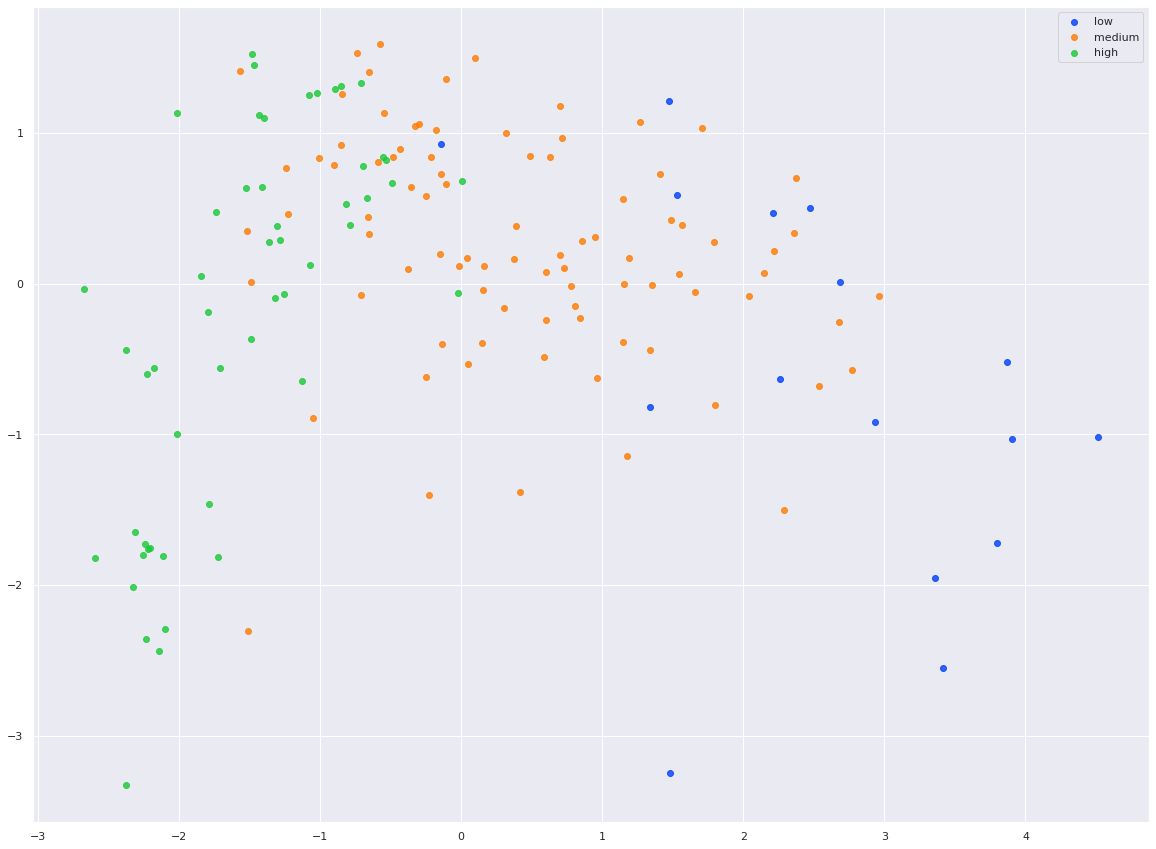

In [26]:
plt.figure(figsize=(20, 15))
for color, label in zip(colors, labels):
    plt.scatter(x_lda[y==label, 0], x_lda[y==label, 1], alpha=.8, color=color, label=label)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

## Linear Model

GDP dan life expectancy

In [27]:
from sklearn.linear_model import LinearRegression

To create the linear regression equation, we fit the data using ```LinearRegression().fit(X, y)```.

In [28]:
happiness.head()

,rank,country,score,gdp,social,life_expectancy,freedom,generosity,corruption,category
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,high
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,high
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,high
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,high
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,high


In [29]:
reg = LinearRegression().fit(happiness.gdp.values.reshape(-1, 1), 
                             happiness.life_expectancy.values.reshape(-1, 1))

In [30]:
print(reg.coef_)
print(reg.intercept_)

[[0.50775798]]
[0.26564776]


In [31]:
y_pred = reg.predict(happiness.gdp.values.reshape(-1, 1))

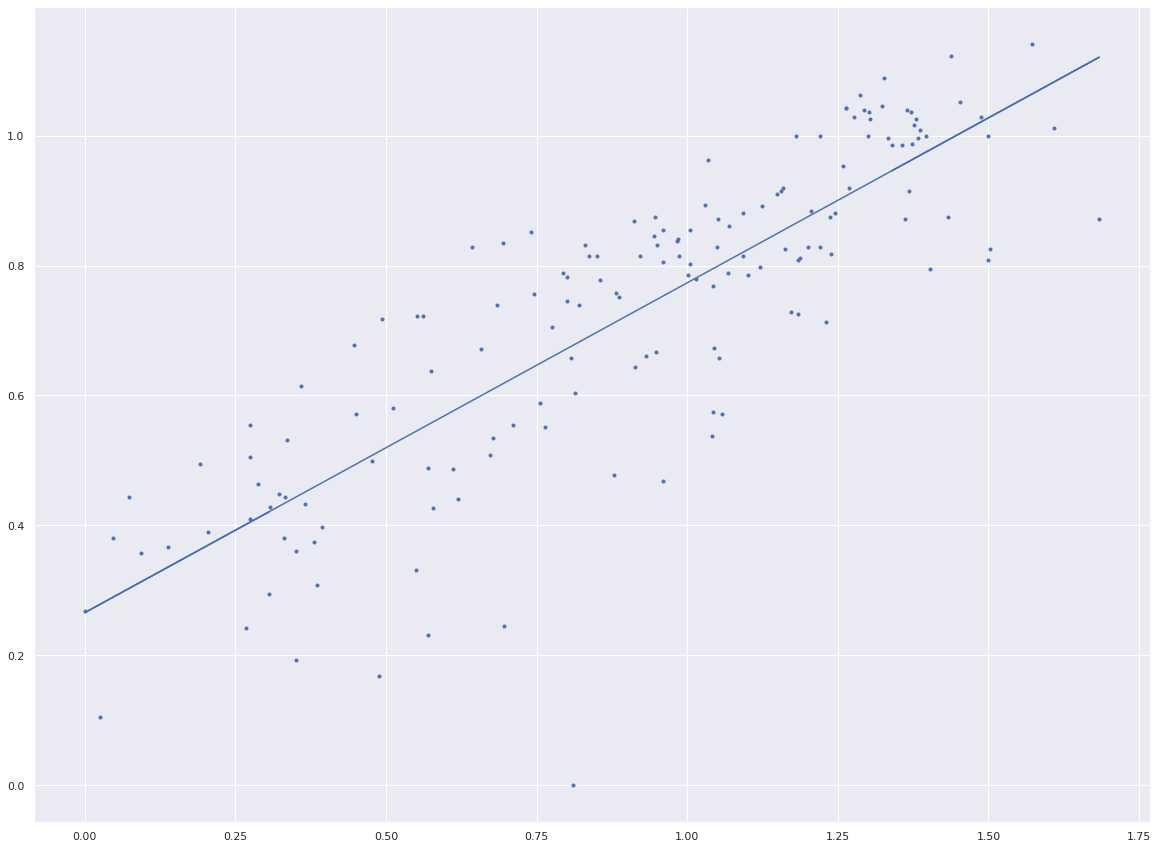

In [32]:
plt.figure(figsize=(20, 15))
plt.scatter(happiness.gdp, happiness.life_expectancy, marker='.')
plt.plot(happiness.gdp, y_pred)
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mean_squared_error(happiness.life_expectancy.values.reshape(-1, 1), y_pred) / happiness.life_expectancy.values.reshape(-1, 1).std()

0.07288744426578452

## Naive Bayes

In [35]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [36]:
happiness.head()

,rank,country,score,gdp,social,life_expectancy,freedom,generosity,corruption,category
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,high
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,high
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,high
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,high
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,high


In [37]:
X = happiness[x_columns]
y = happiness.category

In [38]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
y_train

132    medium
97     medium
22       high
80     medium
101    medium
        ...  
9        high
103    medium
67     medium
117    medium
47       high
Name: category, Length: 124, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [40]:
# create a model 
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [41]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.65625

In [42]:
def acc_percentage(y_test, y_pred):
    return 100*sklearn.metrics.accuracy_score(y_test, y_pred)

In [43]:
result_naivebayes = acc_percentage(y_test, y_pred)
print(f'Akurasi: {acc_percentage(y_test, y_pred):.4f}%')

Akurasi: 65.6250%


**Dengan praprosess menggunakan PCA**

In [44]:
model_pca   = PCA()
x_pca_2 = model_pca.fit_transform(StandardScaler().fit_transform(happiness[x_columns]))

In [45]:
# Lihat sebaran ratio 
model_pca.explained_variance_ratio_

array([0.49826532, 0.23760052, 0.10164186, 0.09271212, 0.04355392,
       0.02622626])

In [46]:
# Create model
X_train, X_test, y_train, y_test = train_test_split(x_pca_2, y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [47]:
result_pca = acc_percentage(y_test, y_pred)
print(f'Akurasi: {acc_percentage(y_test, y_pred):.4f}%')

Akurasi: 68.7500%


**Dengan praproses menggunakan LDA**

In [48]:
model = LinearDiscriminantAnalysis()
X_r2 = model.fit(X, y).transform(X)

In [49]:
X_r2.shape

(156, 2)

In [50]:
model.explained_variance_ratio_

array([0.94021839, 0.05978161])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_r2, y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [52]:
result_lda = acc_percentage(y_test, y_pred)
print(f'Akurasi: {acc_percentage(y_test, y_pred):.4f}%')

Akurasi: 71.8750%


**Summary Naive Bayes Model**


In [53]:
print('Akurasi Naive Bayes saja:', result_naivebayes,'%')
print('Akurasi Naive Bayes + PCA:', result_pca,'%')
print('Akurasi Naive Bayes + LDA:', result_lda,'%')


Akurasi Naive Bayes saja: 65.625 %
Akurasi Naive Bayes + PCA: 68.75 %
Akurasi Naive Bayes + LDA: 71.875 %


# Class Activity #3

In [54]:
# Data preparation
from sklearn import datasets, preprocessing
housing = datasets.fetch_california_housing()

# Create Dataframe from the dataset
housing_df = pd.DataFrame({housing['feature_names'][i]:housing['data'][:,i] 
                           for i in range(len(housing['feature_names']))})

In [55]:
multiplier = 100000 # 100.000 USD 
housing_df['MedVal'] = multiplier*housing.target

In [56]:
# Create a labels
labels = ['low', 'middle', 'high', 'very high', 'luxury']
housing_df['Category'] = pd.cut(housing_df['MedVal'], bins=[0, 1*multiplier, 2*multiplier, 3*multiplier, 4.5*multiplier, float('Inf')], 
                       labels=labels)

In [57]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedVal,Category
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0,luxury
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0,very high
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0,very high
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0,very high
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0,very high
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,78100.0,low
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,77100.0,low
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,92300.0,low
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,84700.0,low


In [58]:
# define the columns of x except category
X_columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedVal']

In [66]:
# split X and y 
# Your code here
X = housing_df[X_columns]
y = housing_df.Category

In [67]:
# Fit the PCA, scale the standard, and transform from the dataset
# Your code here
model_pca = PCA()
x_pca = model_pca.fit_transform(StandardScaler().fit_transform(X))

In [68]:
# evaluate the variance ratio
# Your code here
model_pca.explained_variance_ratio_

array([0.22629636, 0.21947418, 0.17911078, 0.14109388, 0.1114507 ,
       0.07690745, 0.03372196, 0.00707825, 0.00486644])

**Question 1:**

What is the minimum number of main components required to cover the 90% of the variance of the original (scaled) data?

* 2
* 5
* 6
* 7
* 9

In [75]:
round(sum(model_pca.explained_variance_ratio_[0:6])*100, 0)

95.0

**Question 2:**

What percentage of the variance is covered by the first main component? Round to the nearest percent.
* 22
* 23
* 24
* 17
* 90


In [69]:
round(model_pca.explained_variance_ratio_[0] * 100, 0)

23.0

Create a model using Naive Bayes

In [70]:
# Split the dataset into X_train, X_test, y_train,y_test with the 0.2 for test_size 
# and 0 for random_state
# Your code here
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=0)

# Create Naive Bayes model
# Your code here
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [71]:
print(f'Akurasi: {acc_percentage(y_test, y_pred):.4f}%')

Akurasi: 64.5833%


Optional: How about if we use LDA? 
_Create and see the difference!_

In [72]:
# Your code here
model = LinearDiscriminantAnalysis()
X_r2 = model.fit(X, y).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_r2, y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

result_lda = acc_percentage(y_test, y_pred)
print(f'Akurasi: {acc_percentage(y_test, y_pred):.4f}%')

Akurasi: 97.1899%
